In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
salary_train = pd.read_csv('/content/drive/MyDrive/Assignment DS/Assignment 12/SalaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salary_test = pd.read_csv('/content/drive/MyDrive/Assignment DS/Assignment 12/SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [10]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [11]:
categorical = [i for i in salary_train.columns if salary_train[i].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
for i in categorical:
    print(salary_train[i].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [13]:
for i in categorical:
    print(i, 'contains ', salary_train[i].nunique(), 'labels...')

workclass contains  7 labels...
education contains  16 labels...
maritalstatus contains  7 labels...
occupation contains  14 labels...
relationship contains  6 labels...
race contains  5 labels...
sex contains  2 labels...
native contains  40 labels...
Salary contains  2 labels...


In [14]:
for var in categorical:

    print(salary_train[var].value_counts()/np.float(len(salary_train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [15]:
numerical_features=[feature for feature in salary_train.columns if salary_train[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
# Visualize the numerical variables
salary_train[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [16]:
discrete_feature=[feature for feature in numerical_features if len(salary_train[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [18]:
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


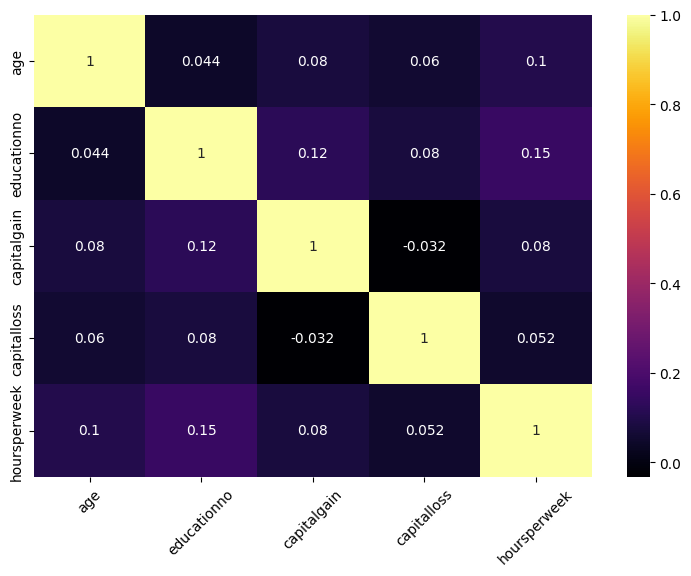

In [19]:
fig = plt.figure(figsize=(9,6))
sns.heatmap(salary_train.corr(),annot=True,cmap='inferno')
plt.xticks(rotation=45);

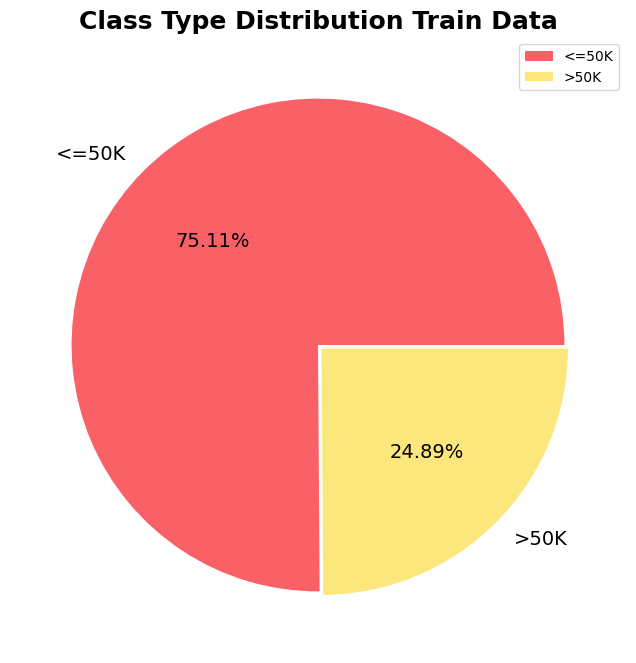

In [20]:
plt.figure(figsize=(8,8))
plt.pie(salary_train['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#F96167", "#FCE77D"], explode=[0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Train Data", fontsize= 18, fontweight= 'bold')
plt.show()

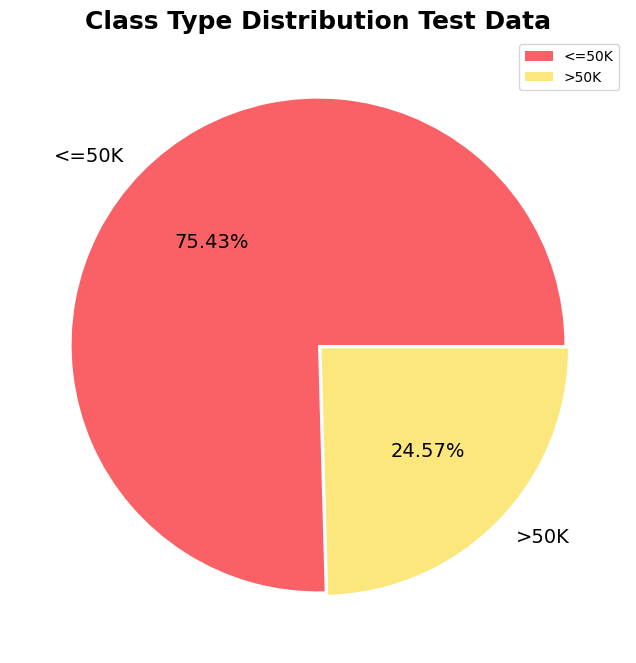

In [21]:
plt.figure(figsize=(8,8))
plt.pie(salary_test['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#F96167", "#FCE77D"], explode= [0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Test Data", fontsize= 18, fontweight= 'bold')
plt.show()

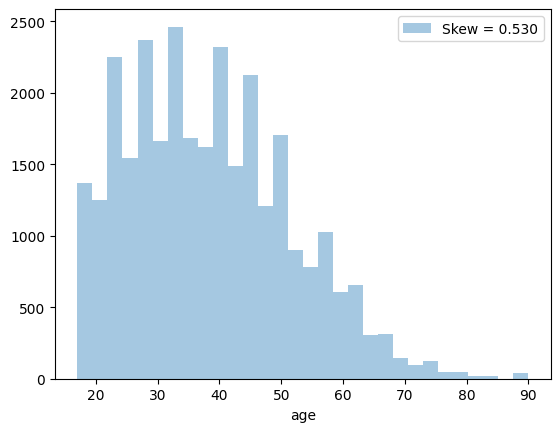

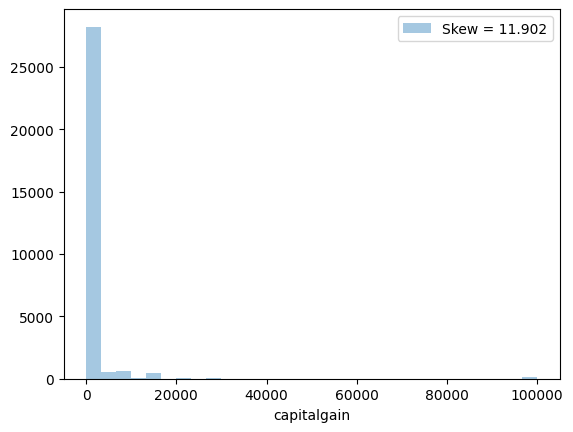

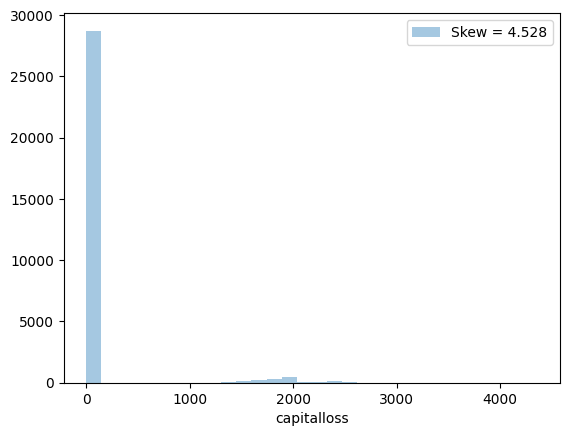

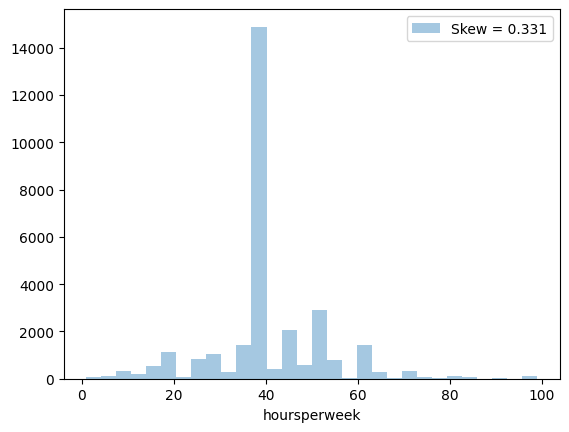

In [22]:
for feat in continuous_feature:
    skew = salary_train[feat].skew()
    sns.distplot(salary_train[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#Outliers Detection

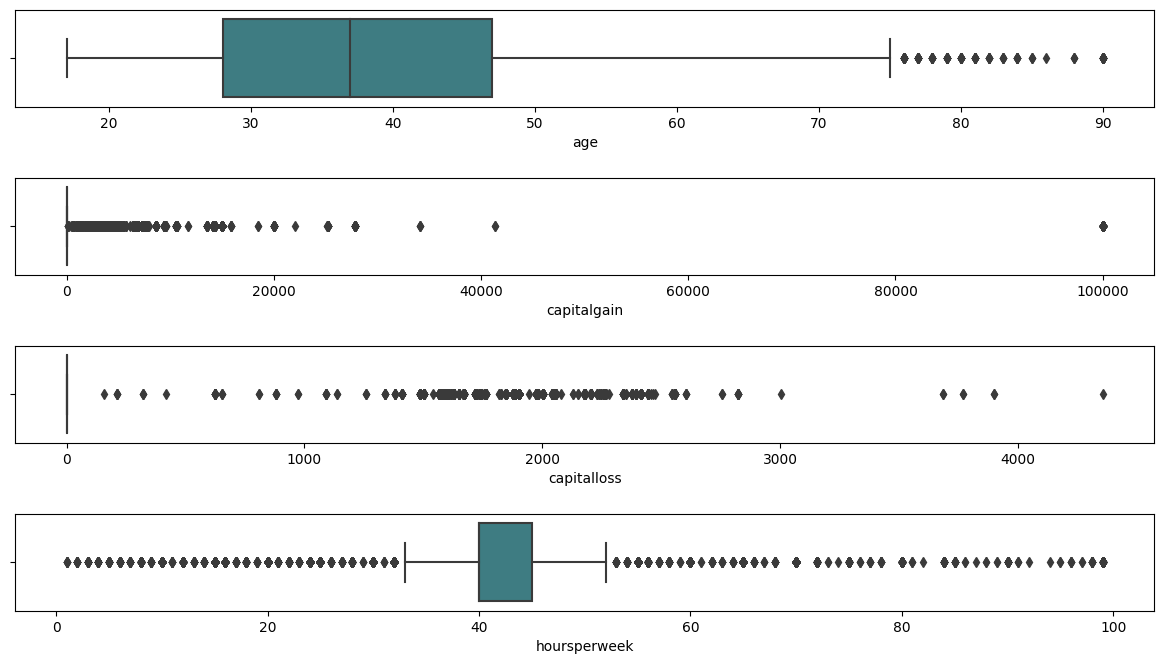

In [23]:
outlier1 = salary_train.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

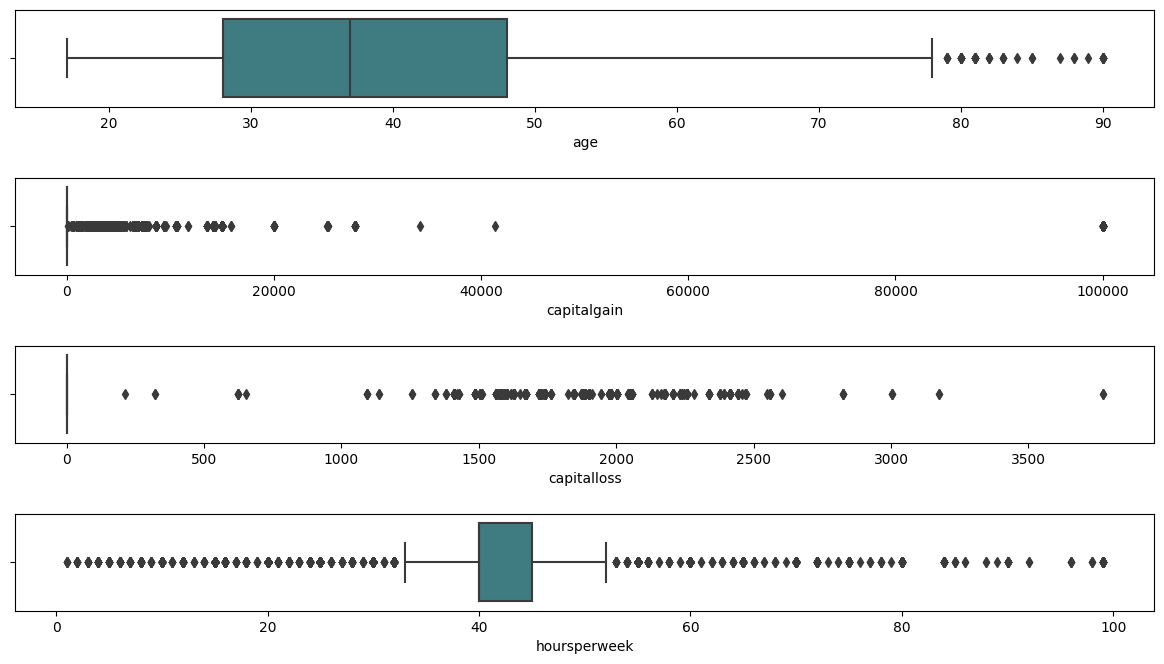

In [24]:
outlier2 = salary_test.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [25]:
categorical_features=[feature for feature in salary_train.columns if salary_train[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
salary_train[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


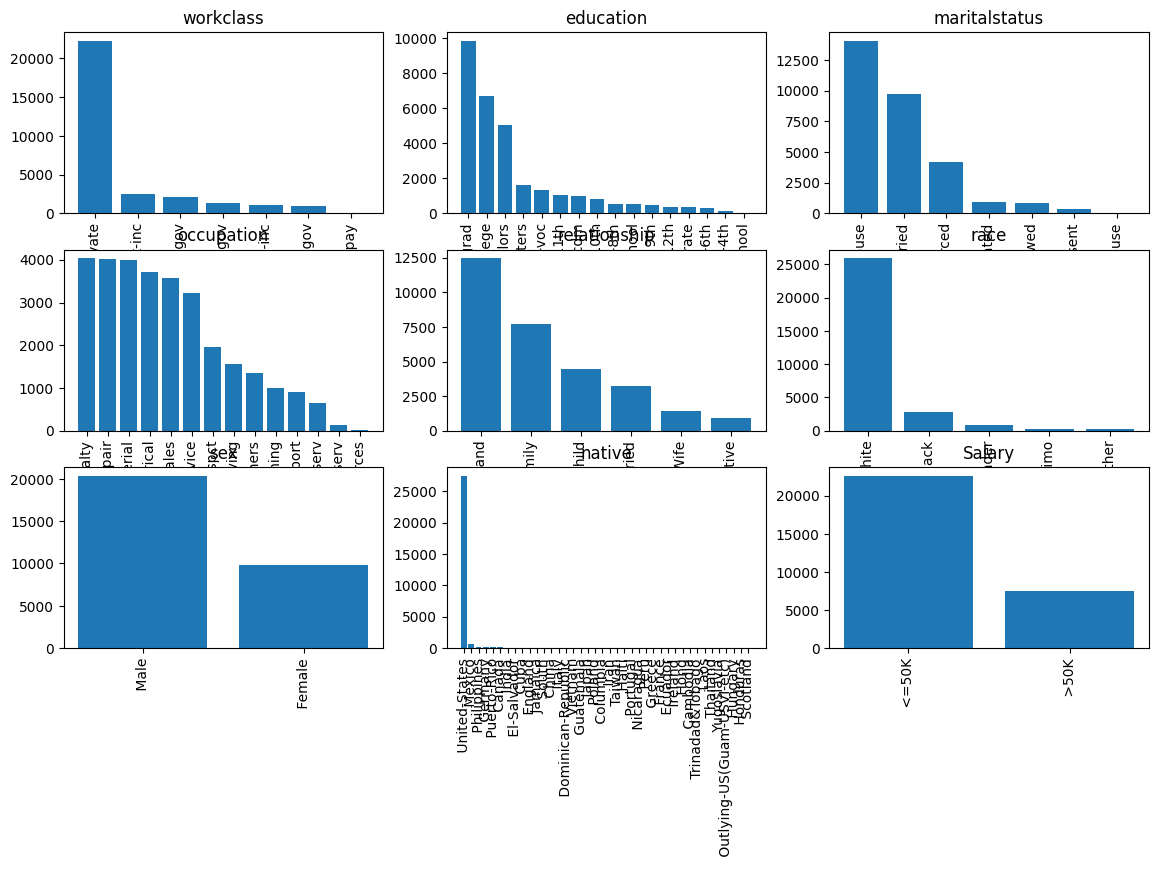

In [26]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(14,8))
counter = 0

for cat_column in categorical_features:
    value_counts = salary_train[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1

plt.show()

In [27]:
le = LabelEncoder()

In [28]:
def encoding(i):
    cols = salary_train.columns
    salary_train[cols[i]]=le.fit_transform(salary_train[cols[i]])
    salary_test[cols[i]]=le.fit_transform(salary_test[cols[i]])

In [29]:
a = [1,2,4,5,6,7,8,12,13]
for i in a:
    encoding(i)

In [30]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [31]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [32]:
X_train = salary_train.drop('Salary',axis=1)
y_train = salary_train[['Salary']]
X_test = salary_test.drop('Salary',axis=1)
y_test = salary_test[['Salary']]

In [33]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [34]:
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [35]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test  :",y_test.shape)

Shape of X_train : (30161, 13)
Shape of X_test  : (15060, 13)
Shape of y_train : (30161, 1)
Shape of y_test  : (15060, 1)


#Model Training & 8.Model testing

In [36]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [37]:
gau_clf = GaussianNB()
gau_clf.fit(X_train, y_train)

print_score(gau_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gau_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810592     0.683834  0.795332      0.747213      0.779038
recall         0.949322     0.330714  0.795332      0.640018      0.795332
f1-score       0.874489     0.445821  0.795332      0.660155      0.767780
support    22653.000000  7508.000000  0.795332  30161.000000  30161.000000
_______________________________________________
Confusion Matrix: 
 [[21505  1148]
 [ 5025  2483]]

Test Result:
Accuracy Score: 79.47%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.812000     0.667956  0.794688      0.739978      0.776611
recall         0.947095     0.326757  0.794688      0.636926      0.794688
f1-score       0.874360     0.438838  0.794688      0.656599      0.767359
support   

#Multinomial naive bayes

In [38]:
mul_clf = MultinomialNB()
mul_clf.fit(X_train, y_train)

print_score(mul_clf, X_train, y_train, X_test, y_test, train=True)
print_score(mul_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.29%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.785993     0.630186  0.772919      0.708090      0.747208
recall         0.958681     0.212440  0.772919      0.585561      0.772919
f1-score       0.863791     0.317761  0.772919      0.590776      0.727867
support    22653.000000  7508.000000  0.772919  30161.000000  30161.000000
_______________________________________________
Confusion Matrix: 
 [[21717   936]
 [ 5913  1595]]

Test Result:
Accuracy Score: 77.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.788574     0.624500  0.774967      0.706537      0.748264
recall         0.958715     0.210811  0.774967      0.584763      0.774967
f1-score       0.865361     0.315215  0.774967      0.590288      0.730199
support   

#categorical naive bayes

In [39]:
cat_clf = CategoricalNB()
cat_clf.fit(X_train, y_train)

print_score(cat_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cat_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890959     0.738585    0.8571      0.814772      0.853028
recall         0.922659     0.659297    0.8571      0.790978      0.857100
f1-score       0.906532     0.696692    0.8571      0.801612      0.854296
support    22653.000000  7508.000000    0.8571  30161.000000  30161.000000
_______________________________________________
Confusion Matrix: 
 [[20901  1752]
 [ 2558  4950]]

Test Result:
Accuracy Score: 85.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.891565     0.732709   0.85664      0.812137      0.852537
recall         0.922095     0.655676   0.85664      0.788885      0.856640
f1-score       0.906573     0.692055   0.85664      0.799314      0.853870
support   

#Model Validation

#Skleran Naive Bayes Classifier

In [40]:
# instantiating the model
model_gau = GaussianNB()
model_mul = MultinomialNB()
model_cat = CategoricalNB()

# fit the model
model_gau.fit(X_train, y_train)
model_mul.fit(X_train, y_train)
model_cat.fit(X_train, y_train)

CategoricalNB()

In [41]:
#Predictions
y_pred_gau = model_gau.predict(X_test)
y_pred_mul = model_mul.predict(X_test)
y_pred_cat = model_cat.predict(X_test)

print('GaussianNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gau)))
print('MultinomialNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_mul)))
print('CategoricalNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_cat)))

GaussianNB Model accuracy score: 0.7947
MultinomialNB Model accuracy score: 0.7750
CategoricalNB Model accuracy score: 0.8566


In [42]:
print('GaussianNB Model', classification_report(y_test, y_pred_gau))
print('MultinomialNB Model', classification_report(y_test, y_pred_mul))
print('CategoricalNB Model', classification_report(y_test, y_pred_cat))

GaussianNB Model               precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060

MultinomialNB Model               precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

CategoricalNB Model               precision    recall  f1-score   support

           0       0.89      0.92      0.91     11360
           1       0.73      0.66      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.81      0.79      0.80     15060
weighted avg     

#Compare data to check for overfitting

In [43]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model_cat.score(X_train, y_train)*100))
print('Test set score: {:.2f}%'.format(model_cat.score(X_test, y_test)*100))

Training set score: 85.71%
Test set score: 85.66%


#Confusion Matrix

In [44]:
y_predict = model_cat.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[10475   885]
 [ 1274  2426]]


#ROC Curve plotting and finding AUC value

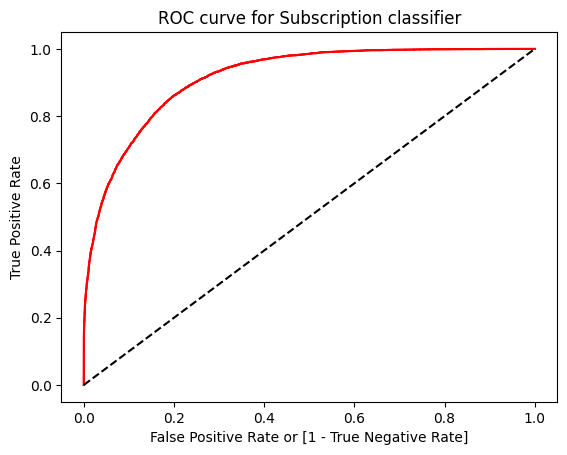

ROC-AUC Score: 0.7888853730491054


In [45]:
fpr,tpr,thresholds = roc_curve(y_train,model_cat.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,color= 'red')
auc = roc_auc_score(y_test,y_pred_cat)

plt.plot(fpr,tpr,color= 'red',label= 'logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('ROC-AUC Score:',auc)

#Conclusion :

*A) For Gaussian    = Training accuracy : 79.53%
                     Testing accuracy  : 79.46%
*B) For Multinomial = Training accuracy : 77.29%                     
                     Testing accuracy  : 77.50%
*C) For Categorical = Training accuracy : 85.71%
                     Testing accuracy  : 85.66%

# model accuracy is best for Categorical Naive Bayes algorithm.


